<a href="https://colab.research.google.com/github/aufawibowo/tugas-akhir/blob/master/LSTM_Versi_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
print("hello world")
pd.__version__

hello world


'0.25.3'

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.layers.core import Dense, Activation, Dropout
import time #helper libraries

Using TensorFlow backend.


In [0]:
input_file = "/content/drive/My Drive/tugas akhir/Shanghai Shenzhen CSI 300 Historical Data.csv"

In [0]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [0]:
# load the dataset
df = read_csv(input_file, header=0, index_col=None, delimiter=',')

In [5]:
print(df['Price'].dtypes)

float64


In [0]:
# take close price column[5]
all_y = df['Price'].values
dataset=all_y.reshape(-1, 1)

In [0]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [0]:
# split into train and test sets, 50% test data, 50% training data
train_size = int(len(dataset) * 0.5)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [0]:
# reshape into X=t and Y=t+1, timestep 240
look_back = 240
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [0]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [12]:
# create and fit the LSTM network, optimizer=adam, 25 neurons, dropout 0.1
model = Sequential()
model.add(LSTM(25, input_shape=(1, look_back)))
model.add(Dropout(0.1))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
model.fit(trainX, trainY, epochs=1000, batch_size=240, verbose=1)





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/1000





264/264 [==============================] - 10s 36ms/step - loss: 0.1196
Epoch 2/1000
264/264 [==============================] - 0s 65us/step - loss: 0.0740
Epoch 3/1000
264/264 [==============================] - 0s 57us/step - loss: 0.0526
Epoch 4/1000
264/264 [==============================] - 0s 61us/step - loss: 0.0335
Epoch 5/1000
264/264 [==============================] - 0s 56us/step - loss: 0.0247
Epoch 6/1000
264/264 [==============================] - 0s 56us/step - loss: 0.0211
Epoch 7/1000
264/264 [==============================] - 0s 53us/step - loss: 0.0152
Epoch 8/1000
264/264 [==============================] - 0s 53us/step - loss: 0.0204
Epoch 9/1000
264/264 [==============================] - 0s 61us/step - loss: 0.0142
Epoch 10/1000
264/264

In [0]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [0]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [15]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 34.19 RMSE
Test Score: 241.84 RMSE


In [0]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [0]:
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

testPrices:


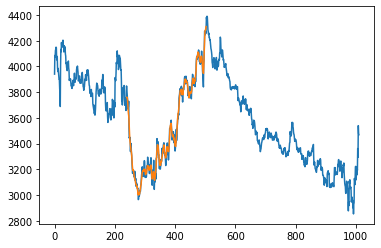

In [18]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
print('testPrices:')
testPrices=scaler.inverse_transform(dataset[test_size+look_back:])

In [19]:
print('testPredictions:')
print(testPredict)

testPredictions:
[[3266.2295]
 [3278.011 ]
 [3286.4739]
 [3287.8865]
 [3292.8516]
 [3295.104 ]
 [3292.2673]
 [3293.4814]
 [3298.6326]
 [3290.8882]
 [3280.1943]
 [3281.3254]
 [3276.0293]
 [3274.236 ]
 [3271.6062]
 [3270.2551]
 [3265.2896]
 [3272.2256]
 [3283.2393]
 [3278.683 ]
 [3284.106 ]
 [3289.595 ]
 [3290.1702]
 [3279.8994]
 [3270.9788]
 [3273.8308]
 [3276.4417]
 [3269.0195]
 [3258.0483]
 [3268.4407]
 [3279.2998]
 [3286.553 ]
 [3287.3628]
 [3293.4863]
 [3295.3276]
 [3299.3354]
 [3310.469 ]
 [3314.0156]
 [3347.0723]
 [3354.577 ]
 [3364.5508]
 [3363.6775]
 [3365.86  ]
 [3380.6511]
 [3396.4119]
 [3404.3184]
 [3417.0186]
 [3421.752 ]
 [3427.4912]
 [3425.226 ]
 [3414.5273]
 [3408.7375]
 [3404.351 ]
 [3403.5017]
 [3410.4192]
 [3425.1719]
 [3426.6572]
 [3439.1025]
 [3450.4375]
 [3437.1306]
 [3434.8655]
 [3437.9688]
 [3433.3984]
 [3439.9036]
 [3441.6277]
 [3436.0603]
 [3434.4514]
 [3430.1816]
 [3434.9055]
 [3434.945 ]
 [3440.841 ]
 [3447.4302]
 [3453.193 ]
 [3445.6587]
 [3441.255 ]
 [3440.7

In [0]:
# export prediction and actual prices
df = pd.DataFrame(data={"prediction": np.around(list(testPredict.reshape(-1)), decimals=2), "test_price": np.around(list(testPrices.reshape(-1)), decimals=2)})
df.to_csv("lstm_result.csv", sep=',', index=None)

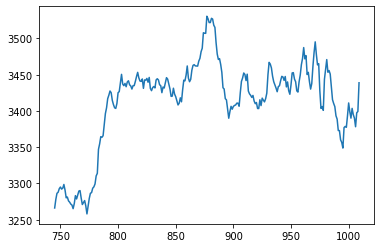

In [21]:
# plot the actual price, prediction in test data=red line, actual price=blue line
plt.plot(testPredictPlot)
plt.show()